# Project 2 Code
- all final code that goes into the report will be pulled from here

**To Do:**
1. The prices are still a little mysterious. When I convert the currency to usd, sometimes the number looks right, but sometimes it doesn't... We could either make an assumption that everything is in USD (which is prob unlikely) or we could try to dig a little deeper
2. I broadly categorized the amenities to be tv	wifi	chromecast	refrigerator	kitchen	view	parking	workspace. Please feel free to add more!
3. I changed the "New" rating to be -1 so that we could do some math manipulation later. I think we need to make an assumption later on what the placeholder is going to be for those listings.
4. If you guys find more thing that we need to do, then please add them to the summary table below on "Summary of things To Do and fix"

### Import python packages and data

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


airbnb = pd.read_csv('airbnb_clean.csv')
pd.set_option('display.max_columns', None)

%matplotlib inline

In [138]:
airbnb.loc[airbnb['rating'] == -1, 'rating'] = 0

In [139]:
airbnb.head()
airbnb['rating'].describe()

count    12805.000000
mean         3.249824
std          2.288724
min          0.000000
25%          0.000000
50%          4.770000
75%          4.930000
max          5.000000
Name: rating, dtype: float64

In [140]:
grouped=airbnb.groupby('country')['rating'].mean().reset_index()
grouped = grouped.sort_values(by='rating', ascending=False)
grouped.head(10)

,country,rating
137,Portugal,5.000000
116,Belize,5.000000
45,Ireland,4.953333
58,Liechtenstein,4.950000
73,New Zealand,4.937143
70,Namibia,4.936667
124,Isle of Man,4.930000
18,Chile,4.921250
145,United Kingdom,4.920000
3,Australian,4.912000


In [141]:
grouped=airbnb.groupby('country')['rating'].mean().reset_index()
grouped = grouped.sort_values(by='rating', ascending=False)
grouped.tail(15)

,country,rating
62,Maldives,1.008788
51,Kazakhstan,0.833333
66,Mongolia,0.721833
77,Oman,0.500000
54,Kuwait,0.000000
5,Azerbaijan,0.000000
7,Bangladesh,0.000000
131,Maldives,0.000000
20,Congo Republic of the Democratic,0.000000
130,Malaysia,0.000000


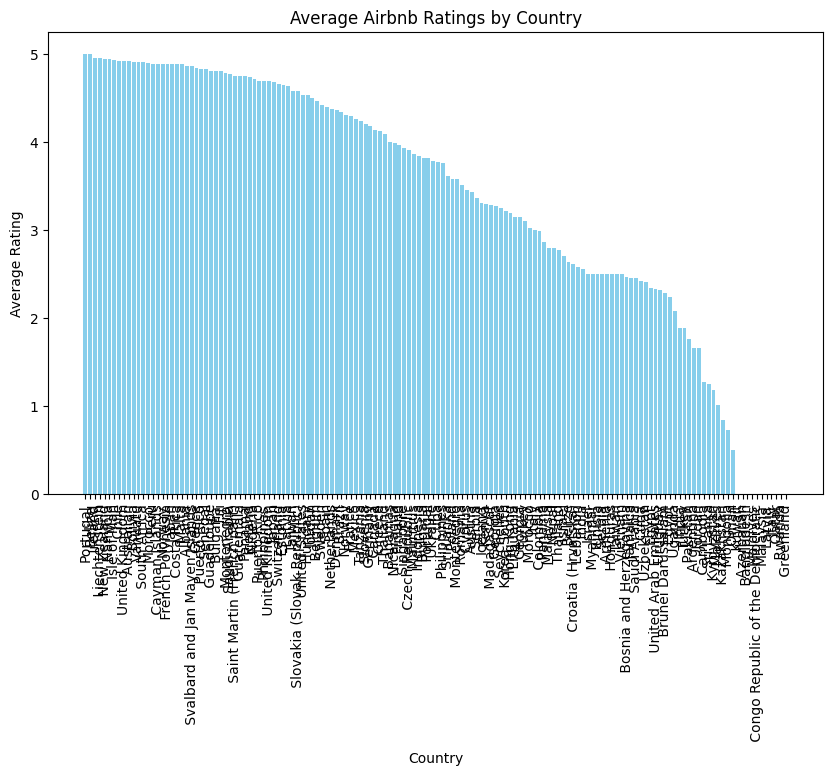

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(grouped['country'], grouped['rating'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Airbnb Ratings by Country')
plt.xticks(rotation=90)  # Rotate the country names for better readability
plt.show()

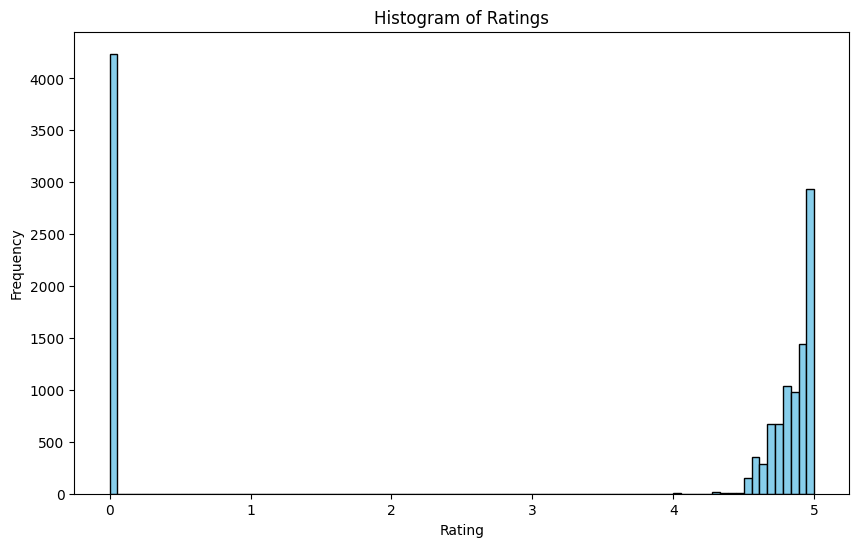

In [143]:
airbnb.loc[airbnb['rating'] == -1, 'rating'] = 0

# Plot the histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(airbnb['rating'], bins=90, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

In [144]:
airbnb['price'].describe()

count    1.280500e+04
mean     1.769780e+04
std      4.569364e+04
min      3.930000e+02
25%      3.994000e+03
50%      8.175000e+03
75%      1.606200e+04
max      1.907963e+06
Name: price, dtype: float64

In [145]:
a = airbnb[['rating', 'price']]
a.describe()

,rating,price
count,12805.000000,1.280500e+04
mean,3.249824,1.769780e+04
std,2.288724,4.569364e+04
min,0.000000,3.930000e+02
25%,0.000000,3.994000e+03
50%,4.770000,8.175000e+03
75%,4.930000,1.606200e+04
max,5.000000,1.907963e+06


            rating        price
count  1233.000000  1233.000000
mean      4.821103  1805.103812
std       0.138594   567.020567
min       4.330000   590.000000
25%       4.720000  1349.000000
50%       4.830000  1817.000000
75%       4.940000  2282.000000
max       5.000000  2748.000000


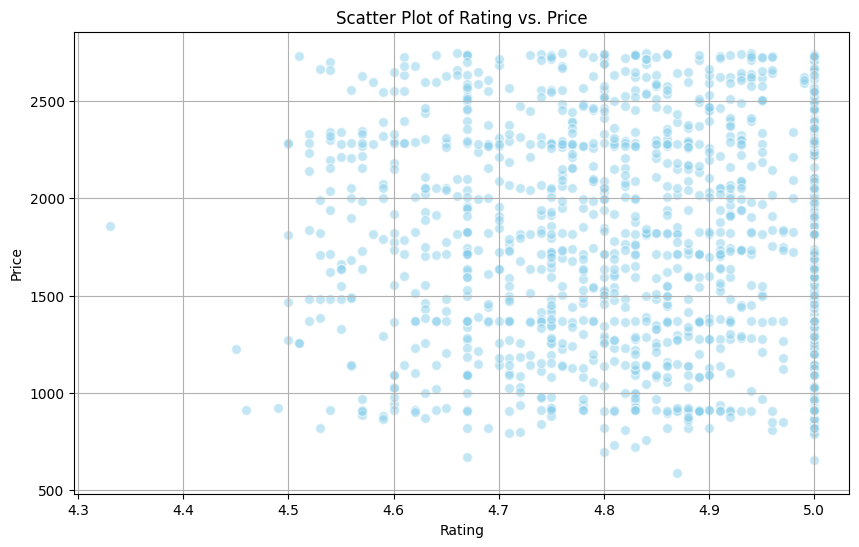

In [146]:
filtered_a = a[(a['rating'] > 4) & (a['price'] < 2750) & (a['price'] > 0)]
print(filtered_a.describe())
plt.figure(figsize=(10, 6))
plt.scatter(filtered_a['rating'], filtered_a['price'], alpha=0.5, c='skyblue', edgecolors='w', s=50)
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Scatter Plot of Rating vs. Price')
plt.grid(True)
plt.show()

In [154]:
columns_to_convert = ['tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
                      'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 
                      'no_parties_or_events']

# Replace 'yes' with 1 and 'no' with 0
airbnb[columns_to_convert] = airbnb[columns_to_convert].replace({True: 1, False: 0})

# Display the first few rows to verify the changes
airbnb.head()

,Unnamed: 0,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
0,0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",8078.0,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,244.140790,1,1,0,0,1,1,1,0,0,0,0,0,0,5,6,10
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,386223873,"Kaş, Antalya, Turkey",4665.0,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,140.989946,1,1,0,0,1,0,1,1,1,0,1,1,1,5,6,10
2,2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",5991.0,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,NaN,1,1,0,0,1,1,1,1,0,0,0,0,0,4,6,10
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",11339.0,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,342.697749,1,1,0,0,1,1,1,0,1,0,1,1,0,4,6,10
4,4,51245886,Bungalov Ev 2,0.00,0,414884116,"Sapanca, Sakarya, Turkey",6673.0,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,201.677580,1,1,0,0,1,0,1,0,0,0,1,1,1,8,6,8


In [172]:
airbnb.describe()

,Unnamed: 0,id,rating,reviews,host_id,price,bathrooms,beds,guests,toilets,bedrooms,studios,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
count,12805.000000,1.280500e+04,12805.000000,12805.000000,1.280500e+04,1.280500e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,1.034400e+04,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000
mean,6402.000000,7.525187e+16,3.249824,36.140023,1.638192e+08,1.769780e+04,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585,1.116871e+04,0.587349,0.804373,0.009293,0.128934,0.746740,0.359547,0.841937,0.324639,0.274502,0.005154,0.515736,0.544084,0.537134,6.328778,6.528231,9.597267
std,3696.629433,2.007933e+17,2.288724,66.077810,1.413622e+08,4.569364e+04,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757,3.811783e+04,0.492330,0.396698,0.095956,0.335140,0.434896,0.479886,0.364815,0.468258,0.446280,0.071611,0.499772,0.498072,0.498639,2.363616,1.189189,1.406075
min,0.000000,1.313100e+04,0.000000,0.000000,2.303900e+04,3.930000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.066675e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
25%,3201.000000,2.023958e+07,0.000000,1.000000,3.700032e+07,3.994000e+03,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,6.139811e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,10.000000
50%,6402.000000,3.682229e+07,4.770000,10.000000,1.256459e+08,8.175000e+03,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,9.007153e+02,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,6.000000,10.000000
75%,9603.000000,4.999760e+07,4.930000,42.000000,2.639623e+08,1.606200e+04,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000,1.048788e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,8.000000,7.000000,10.000000
max,12804.000000,7.017905e+17,5.000000,1003.000000,4.758973e+08,1.907963e+06,50.000000,98.000000,16.000000,1.000000,50.000000,1.000000,1.306494e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,22.000000,20.000000


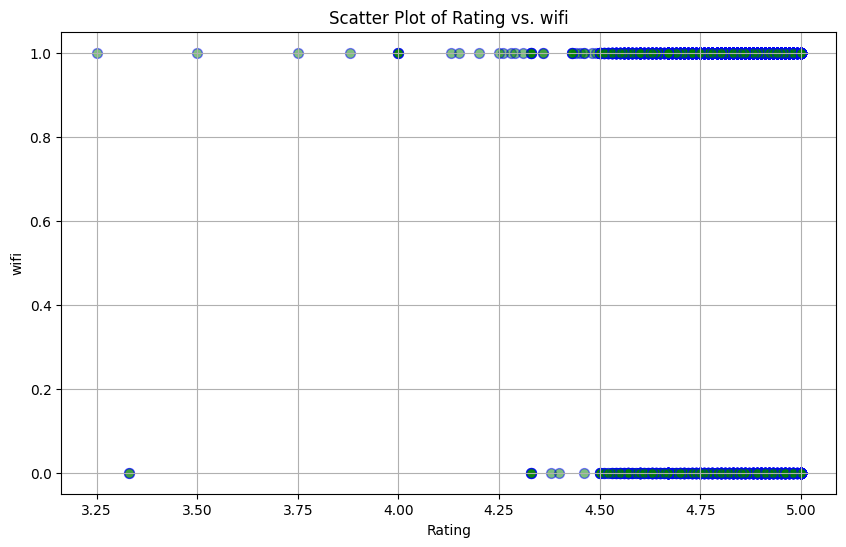

In [195]:
x = airbnb[['rating', 'wifi']]
filtered_x = x[(x['rating'] > 3) & (x['wifi'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_x['rating'], filtered_x['wifi'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('wifi')
plt.title('Scatter Plot of Rating vs. wifi')
plt.grid(True)
plt.show()

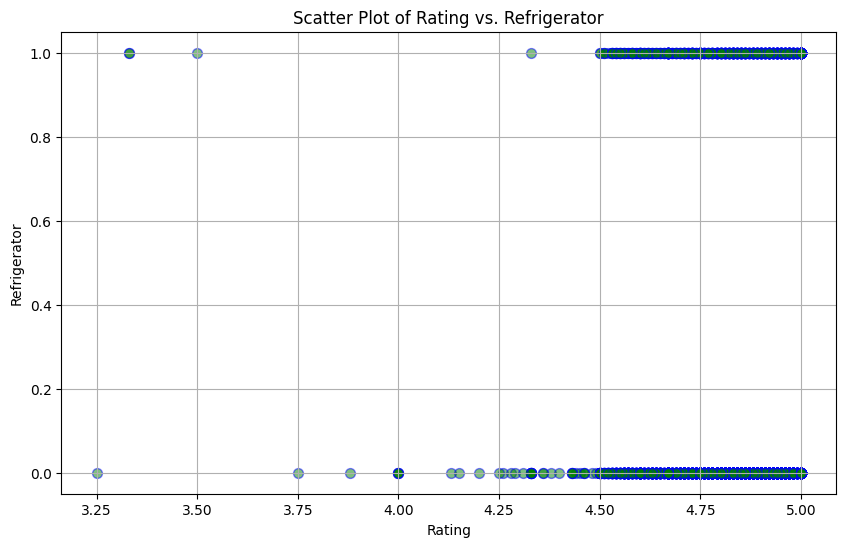

In [202]:
b = airbnb[['rating', 'refrigerator']]
filtered_b = b[(b['rating'] > 3) & (b['refrigerator'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_b['rating'], filtered_b['refrigerator'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('Refrigerator')
plt.title('Scatter Plot of Rating vs. Refrigerator')
plt.grid(True)
plt.show()

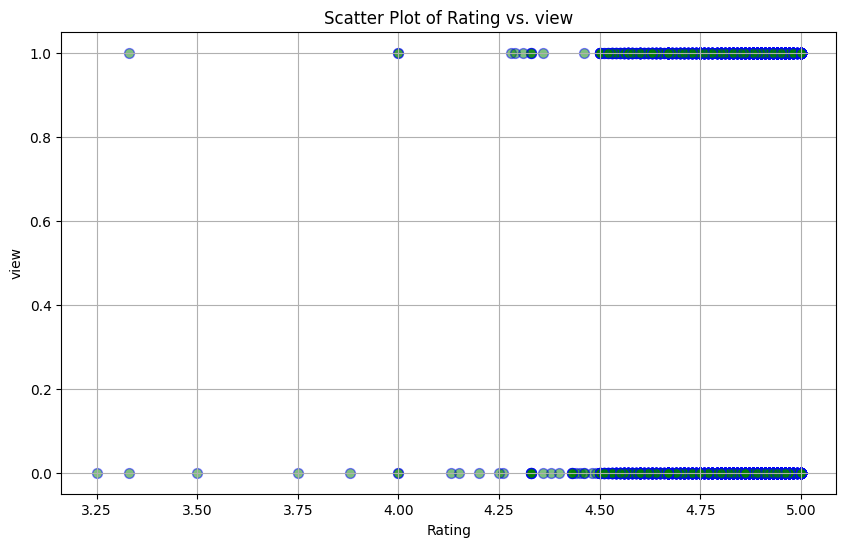

In [200]:
c = airbnb[['rating', 'view']]
filtered_c = c[(c['rating'] > 3) & (c['view'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_c['rating'], filtered_c['view'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('view')
plt.title('Scatter Plot of Rating vs. view')
plt.grid(True)
plt.show()


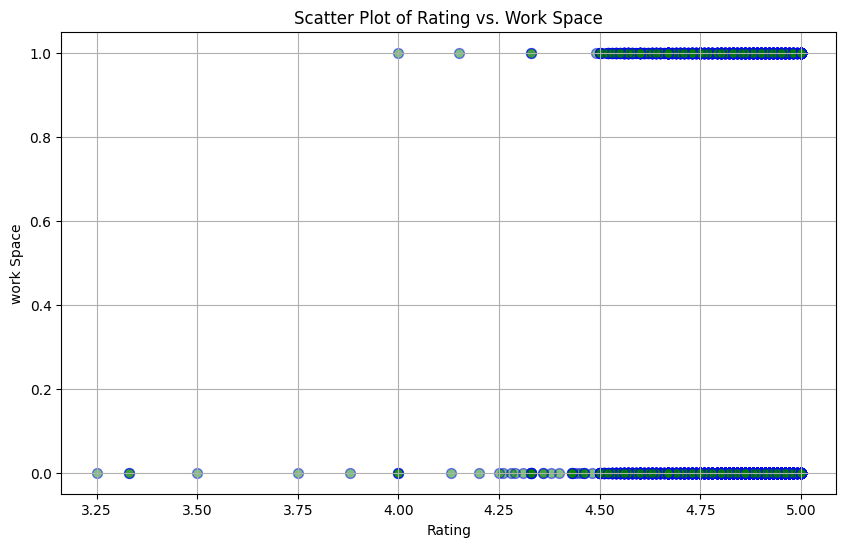

In [199]:
d = airbnb[['rating', 'workspace']]
filtered_d = d[(d['rating'] > 3) & (d['workspace'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_d['rating'], filtered_d['workspace'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('work Space')
plt.title('Scatter Plot of Rating vs. Work Space')
plt.grid(True)
plt.show()

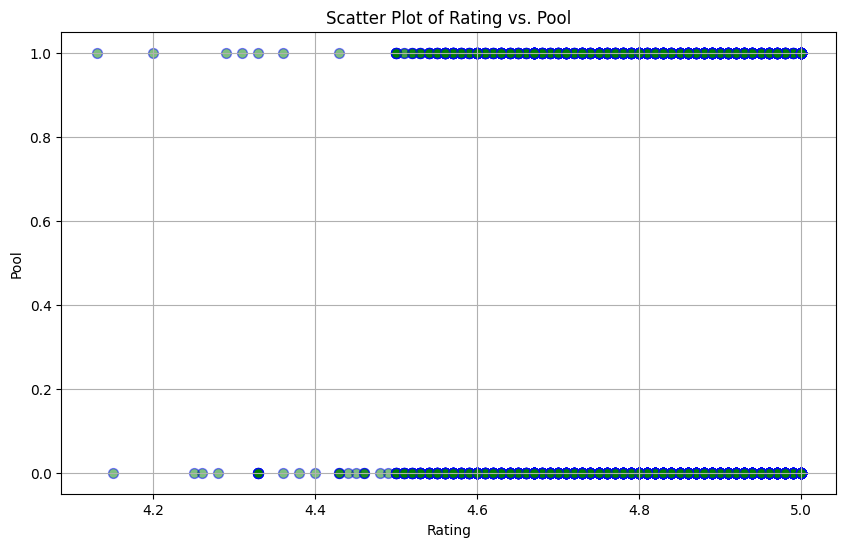

In [197]:
e = airbnb[['rating', 'pool']]
filtered_e = e[(e['rating'] > 4) & (e['pool'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_e['rating'], filtered_e['pool'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('Pool')
plt.title('Scatter Plot of Rating vs. Pool')
plt.grid(True)
plt.show()

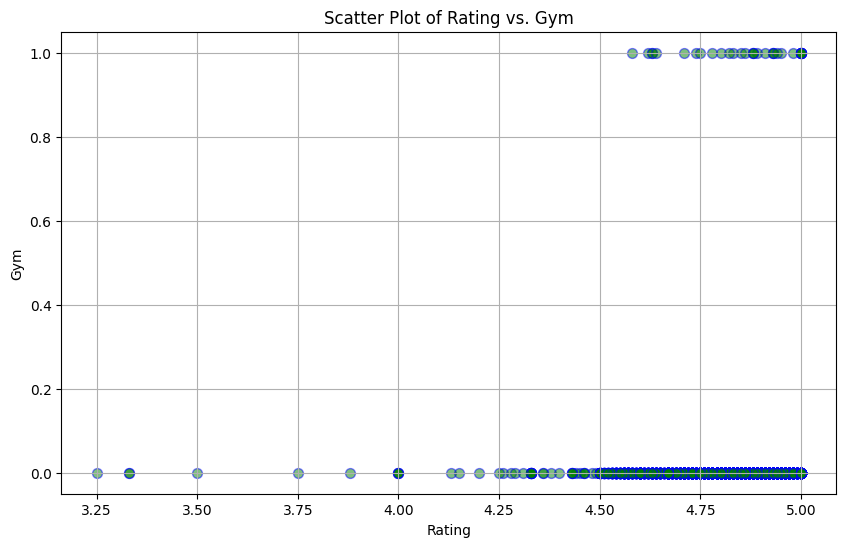

In [216]:
f = airbnb[['rating', 'gym']]
filtered_f = f[(f['rating'] > 3) & (f['gym'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_f['rating'], filtered_f['gym'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('Gym')
plt.title('Scatter Plot of Rating vs. Gym')
plt.grid(True)
plt.show()

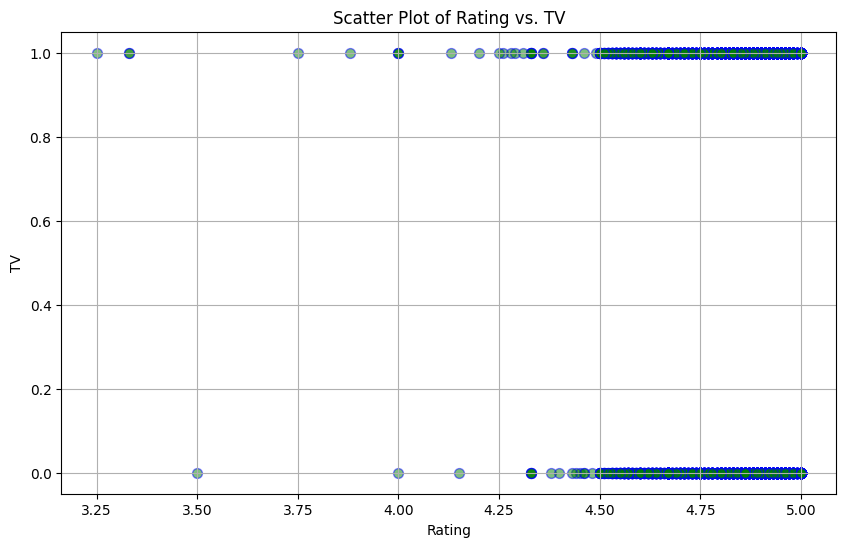

In [217]:
g = airbnb[['rating', 'tv']]
filtered_g = g[(g['rating'] > 3) & (g['tv'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_g['rating'], filtered_g['tv'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('TV')
plt.title('Scatter Plot of Rating vs. TV')
plt.grid(True)
plt.show()

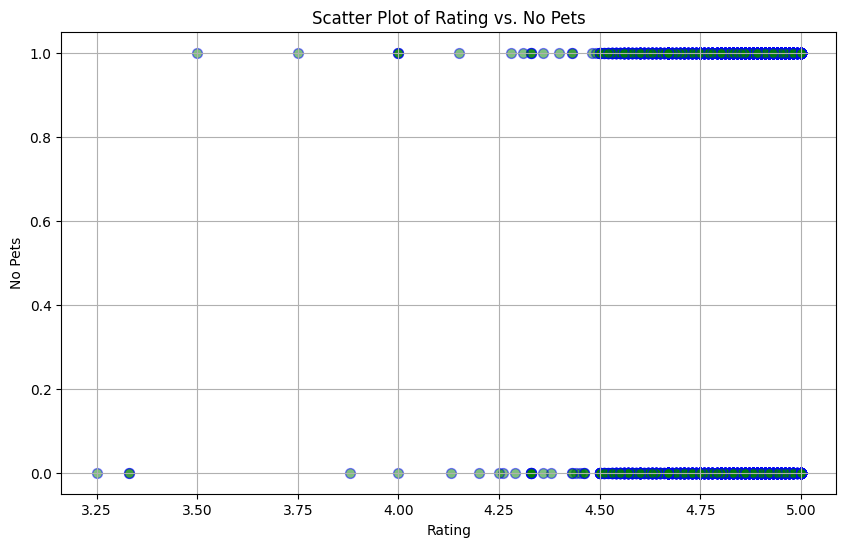

In [219]:
h = airbnb[['rating', 'no_pets']]
filtered_h = h[(h['rating'] > 3) & (h['no_pets'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_h['rating'], filtered_h['no_pets'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('No Pets')
plt.title('Scatter Plot of Rating vs. No Pets')
plt.grid(True)
plt.show()

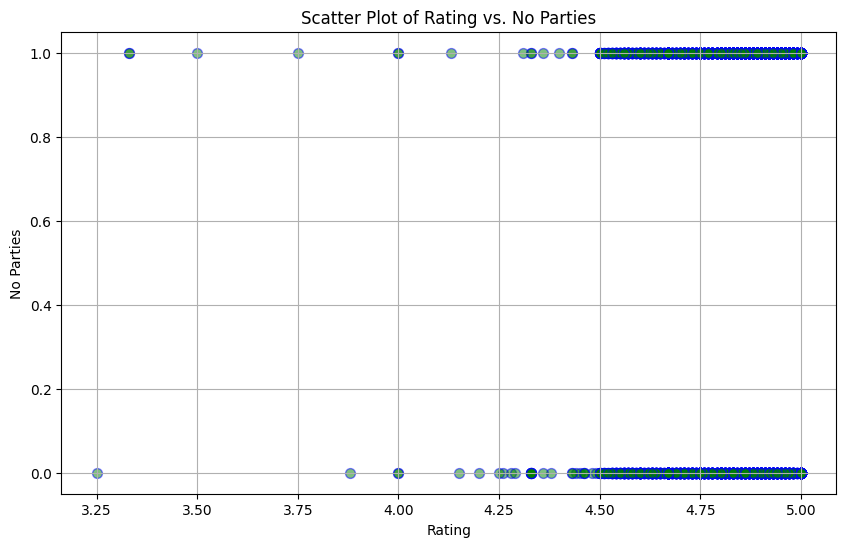

In [220]:
j = airbnb[['rating', 'no_parties_or_events']]
filtered_j = j[(h['rating'] > 3) & (j['no_parties_or_events'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_j['rating'], filtered_j['no_parties_or_events'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('No Parties')
plt.title('Scatter Plot of Rating vs. No Parties')
plt.grid(True)
plt.show()

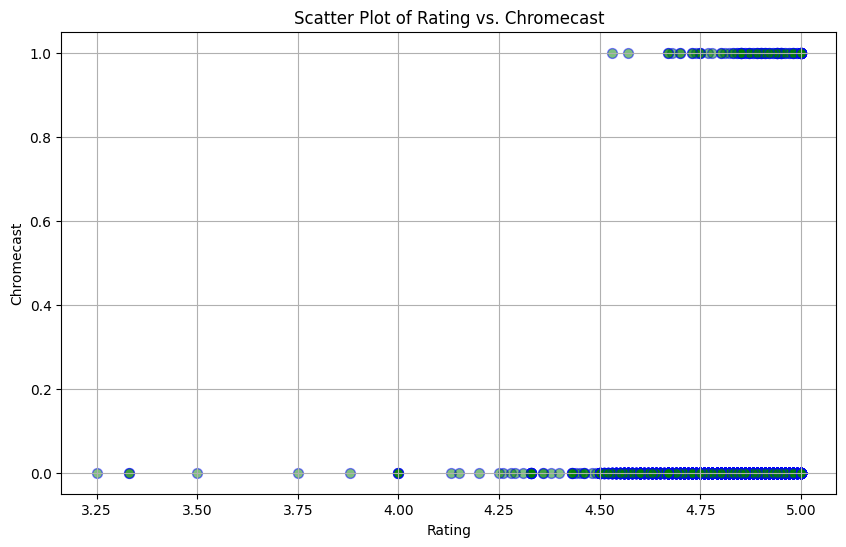

In [221]:
k = airbnb[['rating', 'chromecast']]
filtered_k = k[(k['rating'] > 3) & (k['chromecast'] >= 0)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_k['rating'], filtered_k['chromecast'], alpha=0.5, c='green', edgecolors='b', s=50)
plt.xlabel('Rating')
plt.ylabel('Chromecast')
plt.title('Scatter Plot of Rating vs. Chromecast')
plt.grid(True)
plt.show()

In [222]:
airbnb.head()

,Unnamed: 0,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
0,0,49849504,Perla bungalov,4.71,64,357334205,"Kartepe, Kocaeli, Turkey",8078.0,Turkey,1,1,2,0,2,0,Flexible,12 00 pm,244.140790,1,1,0,0,1,1,1,0,0,0,0,0,0,5,6,10
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,386223873,"Kaş, Antalya, Turkey",4665.0,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,140.989946,1,1,0,0,1,0,1,1,1,0,1,1,1,5,6,10
2,2,50699164,cottages sataplia,4.85,68,409690853,"Imereti, Georgia",5991.0,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,NaN,1,1,0,0,1,1,1,1,0,0,0,0,0,4,6,10
3,3,49871422,Sapanca Breathable Bungalow,5.00,13,401873242,"Sapanca, Sakarya, Turkey",11339.0,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,342.697749,1,1,0,0,1,1,1,0,1,0,1,1,0,4,6,10
4,4,51245886,Bungalov Ev 2,0.00,0,414884116,"Sapanca, Sakarya, Turkey",6673.0,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,201.677580,1,1,0,0,1,0,1,0,0,0,1,1,1,8,6,8


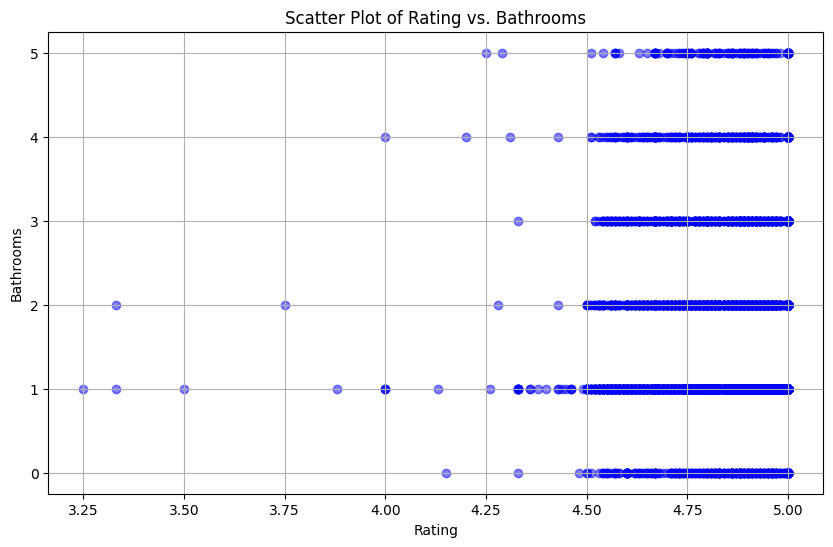

In [233]:
l = airbnb[['rating', 'bathrooms', 'beds']]
filtered_l = l[(l['rating'] > 3) & (l['bathrooms'] <= 5)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_l['rating'], filtered_l['bathrooms'], color='blue', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Bathrooms')
plt.title('Scatter Plot of Rating vs. Bathrooms')
plt.grid(True)
plt.show()

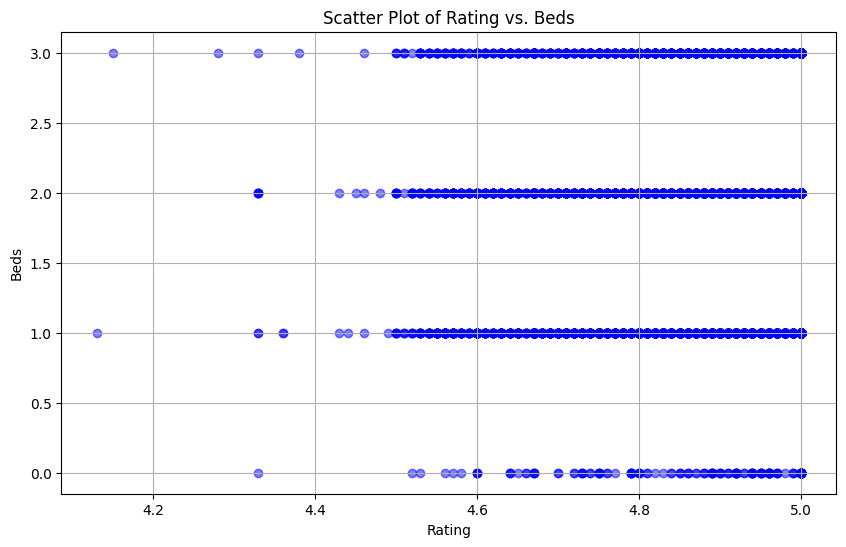

In [240]:
l = airbnb[['rating', 'bathrooms', 'beds']]
filtered_l = l[(l['rating'] > 4) & (l['beds'] <= 3)]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_l['rating'], filtered_l['beds'], color='blue', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Beds')
plt.title('Scatter Plot of Rating vs. Beds')
plt.grid(True)
plt.show()

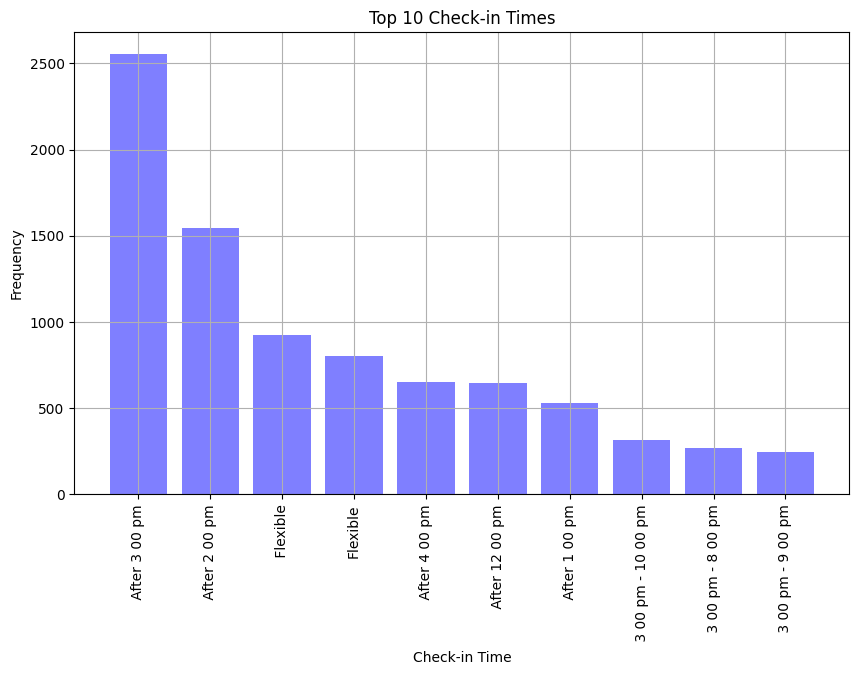

In [249]:
m = airbnb.checkin.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(m.index, m.values, color='blue', alpha=0.5)
plt.xlabel('Check-in Time')
plt.ylabel('Frequency')
plt.title('Top 10 Check-in Times')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

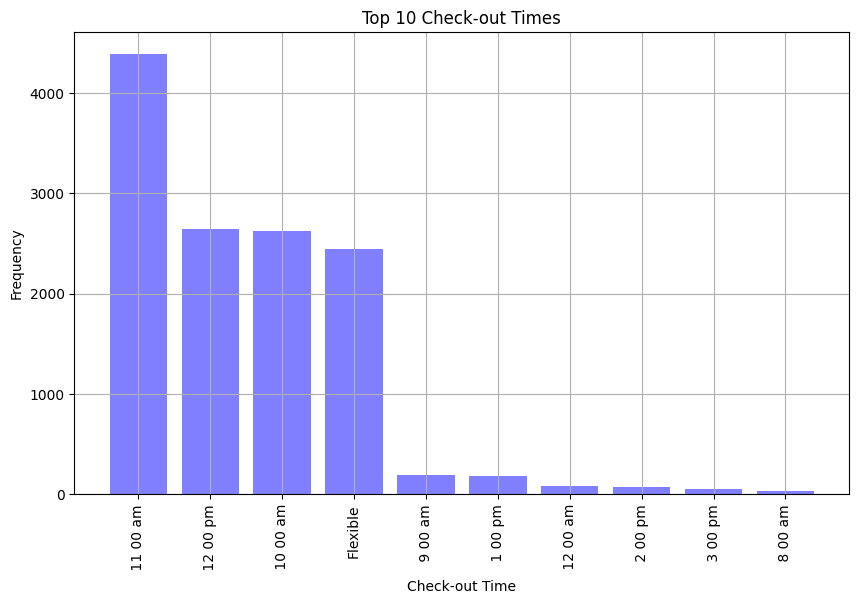

In [250]:
n = airbnb.checkout.value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(n.index, n.values, color='blue', alpha=0.5)
plt.xlabel('Check-out Time')
plt.ylabel('Frequency')
plt.title('Top 10 Check-out Times')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

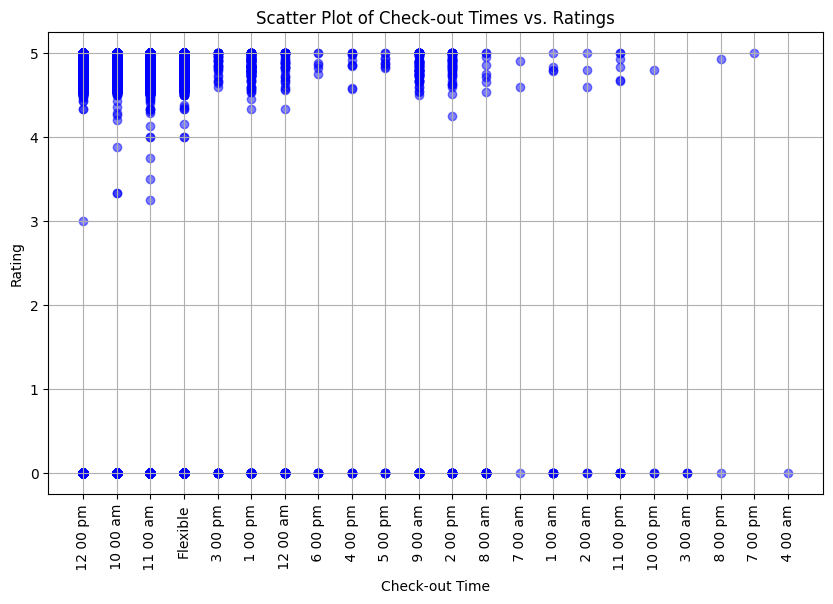

In [253]:
plt.figure(figsize=(10, 6))
plt.scatter(airbnb['checkout'], airbnb['rating'], color='blue', alpha=0.5)
plt.xlabel('Check-out Time')
plt.ylabel('Rating')
plt.title('Scatter Plot of Check-out Times vs. Ratings')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

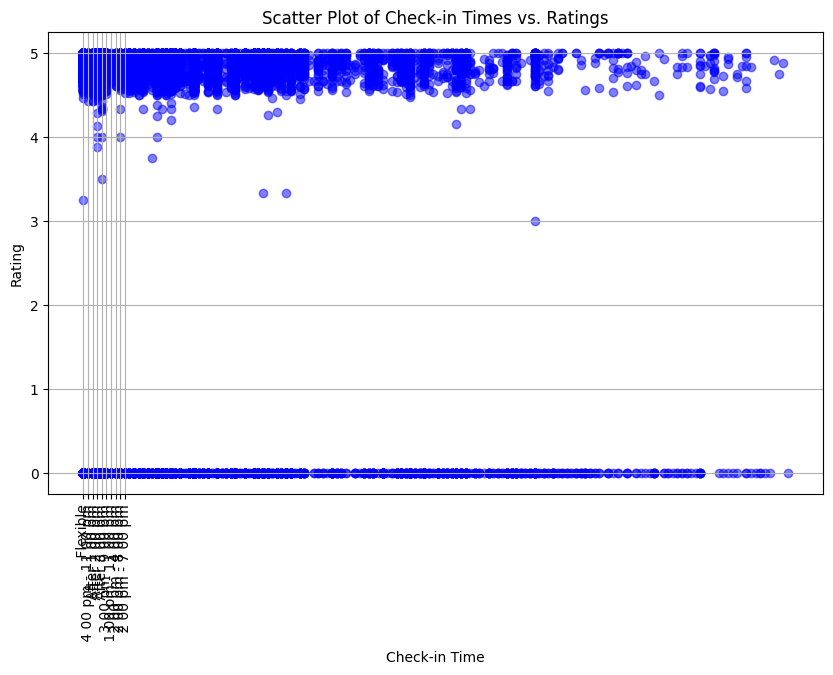

In [265]:
# plt.figure(figsize=(10, 6))
# plt.scatter(airbnb['checkin'], airbnb['rating'], color='blue', alpha=0.5)
# plt.xlabel('Check-in Time')
# plt.ylabel('Rating')
# plt.title('Scatter Plot of Check-in Times vs. Ratings')
# plt.xticks(rotation=90)
# plt.grid(True)
# plt.show()

unique_checkin_times = airbnb['checkin'].unique()
sample_checkin_times = unique_checkin_times[:10]  # Display the first 10 unique check-in times

plt.figure(figsize=(10, 6))
plt.scatter(airbnb['checkin'], airbnb['rating'], color='blue', alpha=0.5)
plt.xlabel('Check-in Time')
plt.ylabel('Rating')
plt.title('Scatter Plot of Check-in Times vs. Ratings')
plt.xticks(ticks=sample_checkin_times, rotation=90)
plt.grid(True)
plt.show()